In [4]:
from PIL import Image
import matplotlib.pyplot as plt
import sys
import os
import cv2
from time import perf_counter
import numpy as np
path='test.png'
path_filled='test_filled.png'
path_loading_speed='test_loading_speed.png'
annotation_file='doc_1.xml'

source_path = os.path.abspath(os.path.join(os.getcwd(), '..','..'))
sys.path.append(source_path)
from src.utils.xml_parsing import load_xml, iter_boxes, add_attribute_to_boxes
from src.utils.xml_parsing import save_xml, iter_images, set_box_attribute,get_box_coords

# time for loading a npy file

In [7]:
# Create a dictionary with two keys, each containing a 10000 dimensional array
data_dict = {
    'array1': np.random.rand(10000),
    'array2': np.random.rand(10000)
}

# Save as npy format
np.save('test_dict.npy', data_dict)

# Measure loading time
start_time = perf_counter()
loaded_dict = np.load('test_dict.npy', allow_pickle=True).item()
end_time = perf_counter()

loading_time = end_time - start_time
print(f"NPY file loading time: {loading_time:.6f} seconds")
print(f"Loaded dictionary keys: {list(loaded_dict.keys())}")
print(f"Array1 shape: {loaded_dict['array1'].shape}")
print(f"Array2 shape: {loaded_dict['array2'].shape}")

# Create a larger dictionary with four keys for comparison
large_data_dict = {
    'array1': np.random.rand(10000),
    'array2': np.random.rand(10000),
    'array3': np.random.rand(10000),
    'array4': np.random.rand(10000)
}

# Save as npy format
np.save('test_dict_large.npy', large_data_dict)

# Measure loading time for larger dictionary
start_time = perf_counter()
loaded_large_dict = np.load('test_dict_large.npy', allow_pickle=True).item()
end_time = perf_counter()

large_loading_time = end_time - start_time
print(f"Large NPY file loading time: {large_loading_time:.6f} seconds")
print(f"Loaded large dictionary keys: {list(loaded_large_dict.keys())}")
print(f"Speed difference: {large_loading_time/loading_time:.2f}x slower")

# Save both dictionaries in a single npy file
combined_dict = {
    'small_dict': data_dict,
    'large_dict': large_data_dict
}
np.save('test_combined_dict.npy', combined_dict)

# Measure loading time for combined dictionary
start_time = perf_counter()
loaded_combined_dict = np.load('test_combined_dict.npy', allow_pickle=True).item()
end_time = perf_counter()

combined_loading_time = end_time - start_time
print(f"Combined NPY file loading time: {combined_loading_time:.6f} seconds")
print(f"Loaded combined dictionary keys: {list(loaded_combined_dict.keys())}")
print(f"Small dict keys: {list(loaded_combined_dict['small_dict'].keys())}")
print(f"Large dict keys: {list(loaded_combined_dict['large_dict'].keys())}")
print(f"Combined vs separate loading time ratio: {combined_loading_time/(loading_time + large_loading_time):.2f}")

NPY file loading time: 0.019859 seconds
Loaded dictionary keys: ['array1', 'array2']
Array1 shape: (10000,)
Array2 shape: (10000,)
Large NPY file loading time: 0.018854 seconds
Loaded large dictionary keys: ['array1', 'array2', 'array3', 'array4']
Speed difference: 0.95x slower
Combined NPY file loading time: 0.014803 seconds
Loaded combined dictionary keys: ['small_dict', 'large_dict']
Small dict keys: ['array1', 'array2']
Large dict keys: ['array1', 'array2', 'array3', 'array4']
Combined vs separate loading time ratio: 0.38


# loading

load_image: mode=cv2 path=test_loading_speed.png size=(31,16) channels=4 time=0.035052s


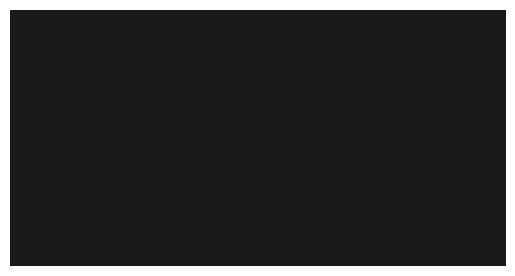

In [8]:
mode="cv2"
# Load the test.png image
img_test = FE.load_image(path_loading_speed,mode=mode, verbose=True)
# Display the image
FE.show_image(img_test,mode=mode)

load_image: mode=cv2 path=test.png size=(2477,3504) channels=3 time=0.086318s


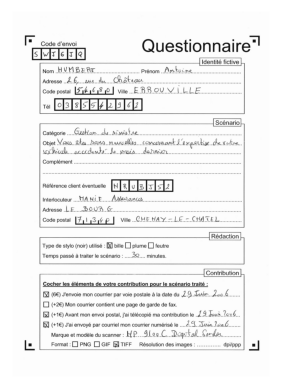

In [9]:
mode="cv2"
# Load the test.png image
img = FE.load_image(path,mode=mode, verbose=True)
# Display the image
FE.show_image(img,mode=mode)

load_image: mode=cv2 path=test_filled.png size=(2473,3504) channels=1 time=0.091425s


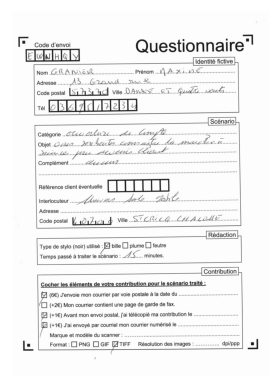

In [10]:
img_filled = FE.load_image(path_filled,mode=mode, verbose=True)
# Display the image
FE.show_image(img_filled,mode=mode)

In [11]:
annotation_tree,root = load_xml(annotation_file)
for box in iter_boxes(root, image_id=0):
    #get coordinates
    box_coords = get_box_coords(box)
    #check what kind of box it is
    #i extract and savefeatures for roi, roi-blank, and align boxes
    if box.label == "align":
        box_1=box
        break
coords = get_box_coords(box_1)
print(f"Box coords: {coords}")

Box coords: (113.29, 230.99, 249.1, 366.81)


crop_patch: mode=cv2 box=(113,230,249,366) size=(136,136) time=0.000046s


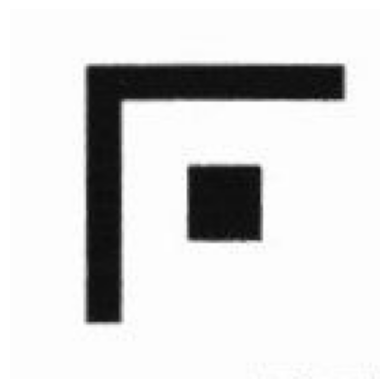

In [12]:
patch = FE.crop_patch(img, box=coords, mode=mode, verbose=True)
FE.show_image(patch,mode=mode)

crop_patch: mode=cv2 box=(113,230,249,366) size=(136,136) time=0.000063s


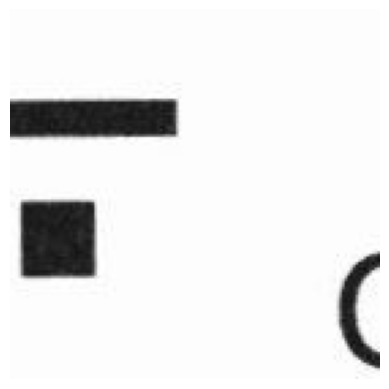

In [13]:
patch_fill = FE.crop_patch(img_filled, box=coords, mode=mode, verbose=True)
FE.show_image(patch_fill,mode=mode)

New box coords: (-89.71, 0, 317.72, 407.46)
crop_patch: mode=cv2 box=(0,0,317,407) size=(317,407) time=0.000080s


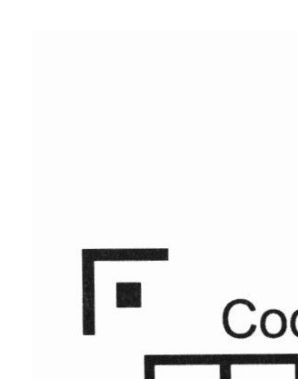

In [14]:
box_size=coords[2]-coords[0], coords[3]-coords[1]
scale_factor=3
new_size=box_size[0]*scale_factor, box_size[1]*scale_factor
xtl,ytl=min(coords[0]-new_size[0]//2,0), min(coords[1]-new_size[1]//2,0)
new_coords=(xtl, ytl, xtl+new_size[0], ytl+new_size[1])
print(f"New box coords: {new_coords}")
patch_fill_big = FE.crop_patch(img_filled, box=new_coords, mode=mode, verbose=True)
FE.show_image(patch_fill_big,mode=mode)

crop_patch: mode=cv2 box=(0,0,317,407) size=(317,407) time=0.000140s


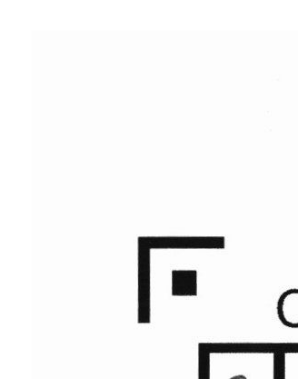

In [15]:
patch_big = FE.crop_patch(img, box=new_coords, mode=mode, verbose=True)
FE.show_image(patch_big,mode=mode)

# time for orb

ORB detection time: 0.6888 seconds
Number of keypoints detected: 20


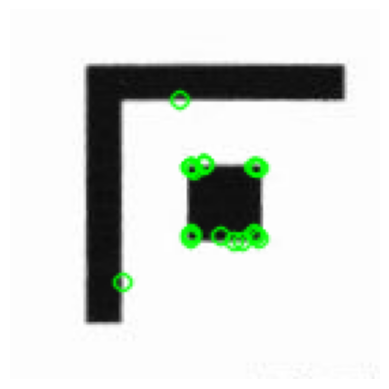

In [16]:
# Apply ORB keypoint detection and measure time
start_time = perf_counter()

# Create ORB detector
orb = cv2.ORB_create()

# Convert patch to grayscale if it's color
if len(patch.shape) == 3:
    patch_gray = cv2.cvtColor(patch, cv2.COLOR_BGR2GRAY)
else:
    patch_gray = patch

# Detect keypoints and descriptors
keypoints, descriptors = orb.detectAndCompute(patch_gray, None)

end_time = perf_counter()
detection_time = end_time - start_time

print(f"ORB detection time: {detection_time:.4f} seconds")
print(f"Number of keypoints detected: {len(keypoints)}")

# Draw keypoints on the image
patch_with_keypoints = cv2.drawKeypoints(patch, keypoints, None, color=(0, 255, 0), flags=0)

# Show the image with keypoints
FE.show_image(patch_with_keypoints, mode=mode)

# time for template matching

In [17]:
# Read images
if len(patch_fill_big.shape) == 3:
    big = cv2.cvtColor(patch_fill_big, cv2.COLOR_BGR2GRAY)
else:
    big = patch_fill_big
if len(patch.shape) == 3:
    patch_gray = cv2.cvtColor(patch, cv2.COLOR_BGR2GRAY)
else:
    patch_gray = patch
w, h = patch_gray.shape[::-1]

start_time = perf_counter()
# Template matching
res = cv2.matchTemplate(big, patch_gray, cv2.TM_CCOEFF_NORMED)
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)

# For TM_SQDIFF methods, the best match is min_loc; otherwise, max_loc
top_left = max_loc
bottom_right = (top_left[0] + w, top_left[1] + h)
end_time = perf_counter()
matching_time = end_time - start_time
print(f"Template matching time: {matching_time:.4f} seconds")

'''
# Draw rectangle
cv2.rectangle(big, top_left, bottom_right, 0, 2)
cv2.imshow('Match', big)
cv2.waitKey(0)
cv2.destroyAllWindows()'''

Template matching time: 0.0319 seconds


"\n# Draw rectangle\ncv2.rectangle(big, top_left, bottom_right, 0, 2)\ncv2.imshow('Match', big)\ncv2.waitKey(0)\ncv2.destroyAllWindows()"

In [ ]:
big.shape

# time for ecc

In [ ]:
# Read images
if len(patch_fill_big.shape) == 3:
    big = cv2.cvtColor(patch_fill_big, cv2.COLOR_BGR2GRAY)
else:
    big = patch_fill_big
if len(patch_big.shape) == 3:
    patch_gray = cv2.cvtColor(patch_big, cv2.COLOR_BGR2GRAY)
else:
    patch_gray = patch_big

start_time = perf_counter()
# Initialize warp matrix
warp_matrix = np.eye(2, 3, dtype=np.float32)

# Define the motion model and criteria
criteria = (cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, 50, 1e-6)

# Run ECC
(cc, warp_matrix) = cv2.findTransformECC(big, patch_gray, warp_matrix, cv2.MOTION_AFFINE, criteria)

end_time = perf_counter()
ecc_time = end_time - start_time
print(f"ECC alignment time: {ecc_time:.4f} seconds")

# Apply the warp
aligned = cv2.warpAffine(patch_gray, warp_matrix, (big.shape[1], big.shape[0]), flags=cv2.INTER_LINEAR + cv2.WARP_INVERSE_MAP)
FE.show_image(aligned,mode=mode)

# reload

In [5]:
def reload_modules():
    import importlib
    import src.utils.feature_extraction as FE

    importlib.reload(FE)
    return FE
FE = reload_modules()